<a href="https://colab.research.google.com/github/natooosh/natooosh/blob/main/default_cc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
default_cc = pd.read_csv('/content/default of credit card clients.csv')
default_cc.head(50)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [ ]:
default_cc.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
default_cc.shape

(30000, 25)

In [ ]:
default_cc.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [ ]:
default_cc['PAY_0']== -1

0        False
1         True
2        False
3        False
4         True
         ...  
29995    False
29996     True
29997    False
29998    False
29999    False
Name: PAY_0, Length: 30000, dtype: bool

In [ ]:
default_cc['SEX'] = default_cc['SEX'].astype('category')
default_cc['EDUCATION'] = default_cc['EDUCATION'].astype('category')
default_cc['MARRIAGE'] = default_cc['MARRIAGE'].astype('category')
default_cc['PAY_0'] = default_cc['PAY_0'].astype(float)
default_cc['PAY_2'] = default_cc['PAY_2'].astype(float)
default_cc['PAY_3'] = default_cc['PAY_3'].astype(float)
default_cc['PAY_4'] = default_cc['PAY_4'].astype(float)
default_cc['PAY_5'] = default_cc['PAY_5'].astype(float)
default_cc['PAY_6'] = default_cc['PAY_6'].astype(float)
default_cc['default payment next month'] = default_cc['default payment next month'].astype('category')

In [ ]:
default_cc.dtypes

ID                               int64
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                          float64
PAY_2                          float64
PAY_3                          float64
PAY_4                          float64
PAY_5                          float64
PAY_6                          float64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
dtype: object

In [ ]:
default_cc.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

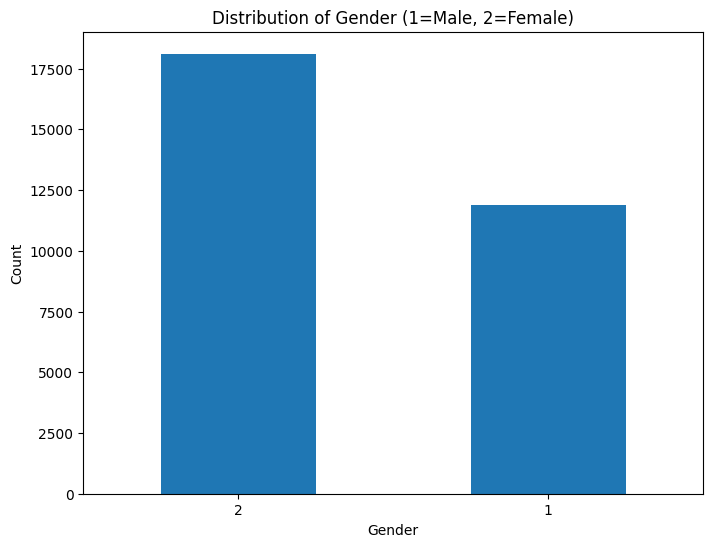

In [ ]:
plt.figure(figsize=(8, 6))
default_cc['SEX'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender (1=Male, 2=Female)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

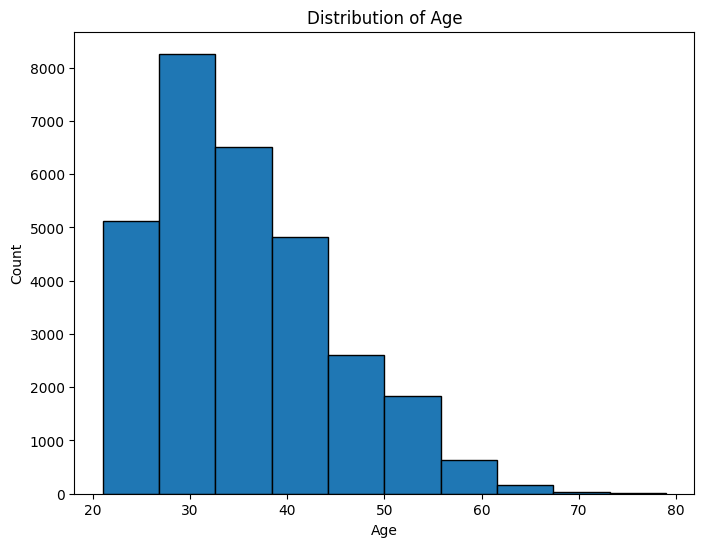

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(default_cc['AGE'], edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
default_cc_without_dep = default_cc.drop('default payment next month', axis=1)
X = default_cc_without_dep[['SEX', 'EDUCATION']]
X = pd.get_dummies(X)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(dCC_mod1)

Y = default_cc['default payment next month']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

logreg_mod1 = LogisticRegression()

logreg_mod1.fit(X_train, Y_train)

coef_df = pd.DataFrame({'Features': X.columns, 'Coefficient': logreg_mod1.coef_[0]})
print(coef_df)

Y_pred = logreg_mod1.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Y_pred_prob = logreg_mod1.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(Y_test, Y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC) for Model 1: {auroc}')

      Features  Coefficient
0        SEX_1     0.102254
1        SEX_2    -0.111234
2  EDUCATION_0    -0.676395
3  EDUCATION_1     0.384481
4  EDUCATION_2     0.686537
5  EDUCATION_3     0.741258
6  EDUCATION_4    -0.502495
7  EDUCATION_5    -0.736411
8  EDUCATION_6     0.094044
Accuracy: 0.7822222222222223
Area under receiver operating characteric curve (AUROC) for Model 1: 0.545297824385436


In [ ]:
X = default_cc_without_dep[['EDUCATION', 'AGE', 'MARRIAGE']]
numeric_var = ['AGE']
cat_var = ['EDUCATION', 'MARRIAGE']
X = pd.get_dummies(X, columns=cat_var)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Y = default_cc['default payment next month']

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

logreg_mod2 = LogisticRegression()

logreg_mod2.fit(X_train, Y_train)

coef_df = pd.DataFrame({'Features': X.columns, 'Coefficient': logreg_mod2.coef_[0]})
print(coef_df)

Y_pred = logreg_mod2.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Y_pred_prob = logreg_mod2.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(Y_test, Y_pred_prob)
print(f'Area under receiver operating characteric curve (AUROC) for Model 2: {auroc}')

       Features  Coefficient
0           AGE    -0.001688
1   EDUCATION_0    -0.143561
2   EDUCATION_1    -0.074033
3   EDUCATION_2     0.063671
4   EDUCATION_3     0.066745
5   EDUCATION_4    -0.072716
6   EDUCATION_5    -0.131650
7   EDUCATION_6    -0.016848
8    MARRIAGE_0    -0.039079
9    MARRIAGE_1     0.025857
10   MARRIAGE_2    -0.026001
11   MARRIAGE_3     0.016991
Accuracy: 0.7822222222222223
Area under receiver operating characteric curve (AUROC) for Model 2: 0.5464574153525046
